In [1]:
# collisionData plot
import numpy as np

In [2]:
Data = np.load(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\CollisionData.npy')
#Data = np.load('logs/CollisionData.npy')
Data.shape

(117649, 17)

Data = np.hstack((config, y.reshape(-1,1),EEPosition,EEOrientation,EEQuaternion))

In [3]:
config, y, EEPosition, EEOrientation, EEQuaternion = Data[:,:6], Data[:,6], Data[:,7:10], Data[:,10:13], Data[:,13:17]

<IPython.core.display.Javascript object>


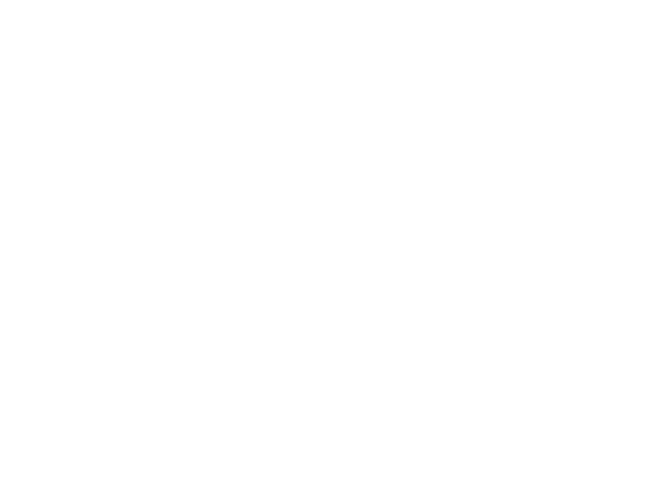

In [4]:
# plot all points
#%matplotlib inline
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition[:,1], EEPosition[:,2], -EEPosition[:,0])
plt.show()

[[-0.13358343  0.13937679 -0.12829268]
 [-0.13358343  0.13937679 -0.12829268]
 [-0.10452056  0.29297423 -0.36421895]
 ...
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]


<IPython.core.display.Javascript object>


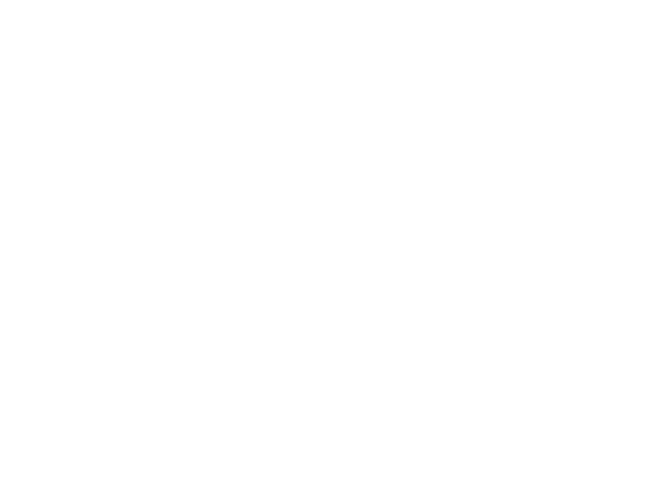

In [5]:
# plot points in C-free
EEPosition_free = EEPosition[y==0,:]
print(EEPosition_free)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_free[:,1], EEPosition_free[:,2], -EEPosition_free[:,0])
plt.show()

In [6]:
# C-free point orientation
EEOrientation_free = EEOrientation[y==0,:]
print(EEOrientation_free)

# C-free point quaternion
EEQuaternion_free = EEQuaternion[y==0,:]
print(EEQuaternion_free)

[[ 0.1994912  -0.4926948  -0.81324559]
 [ 0.1994912  -0.4926948  -0.81324559]
 [-2.01463223 -0.4926959  -2.32834673]
 ...
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
[[ 0.18467034 -0.1846699  -0.40396655  0.87670118]
 [ 0.18467034 -0.1846699  -0.40396655  0.87670118]
 [-0.20463538 -0.80454409 -0.3942292   0.39422908]
 ...
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [7]:
# insertion of C-free points
from transforms3d import quaternions
total_config = EEPosition_free.shape[0]

new_config = 20   # !!! setup insertion linspace numbers here
EEPosition_new  = np.zeros((total_config*new_config, 3))
EEOrientation_new  = np.zeros((total_config*new_config, 3))
EEQuaternion_new  = np.zeros((total_config*new_config, 4))

count = 0
for i in range(total_config):
    quat = EEQuaternion_free[i,:]
    orient = EEOrientation_free[i,:]
    pos = np.matrix(EEPosition[i,:]).T
    #quat = quaternions.qinverse(quat)
    # inverse transformation matrix
    M = quaternions.quat2mat(quat)
    M = M.T
    
    offset = np.linspace(0,0.5,new_config)
    
    for j in range(new_config):
        insertion = np.array([[0],[0],[offset[j]]])
        
        # inverse transformation matrix
        insertion = -np.matmul(M,insertion)
        
        homo = np.array([0,0,0,1])
        T = np.hstack((M, insertion))
        T = np.vstack((T,homo))
        #print(insertion)
        #print(T)

        h_pos_new = T*np.vstack((pos,1))
        #print(h_pos_new)
        pos_new = np.asarray(h_pos_new[:3]).reshape(-1)
        EEPosition_new[count,:] = pos_new
        EEOrientation_new[count,:] = orient
        EEQuaternion_new[count,:] = quat
        count += 1
    #print(pos_new)
print(EEPosition_new)

[[ 0.29243256  0.12370213 -0.35860127]
 [ 0.29702728  0.14413692 -0.37453328]
 [ 0.301622    0.16457171 -0.39046528]
 ...
 [ 0.16060972  0.2351504  -0.81769989]
 [ 0.16060972  0.2351504  -0.84401568]
 [ 0.16060972  0.2351504  -0.87033147]]


<IPython.core.display.Javascript object>


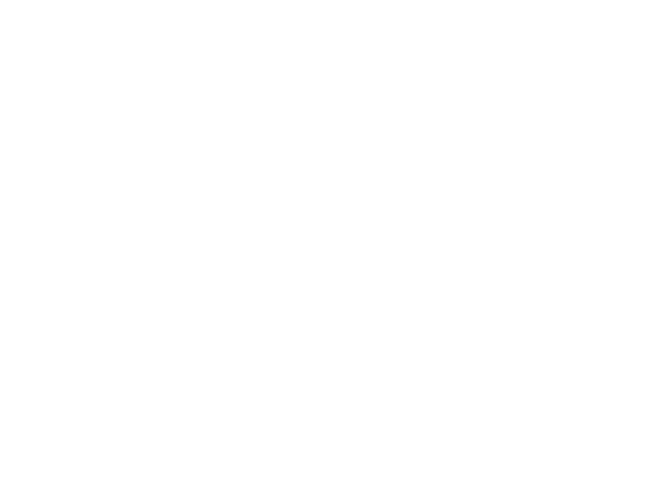

In [8]:
# plot new points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new[:,1], EEPosition_new[:,2], -EEPosition_new[:,0])
plt.show()

In [9]:
EEPosition.shape

(117649, 3)

In [10]:
# set surface size
xmin = ymin = -0.2
xmax = ymax = 0.2

In [11]:
inplane_x = np.logical_and((-EEPosition_new[:,1]>xmin), (-EEPosition_new[:,1]<xmax))
inplane_y = np.logical_and((EEPosition_new[:,2]>ymin), (EEPosition_new[:,2]<ymax))
inplane_z = np.logical_and((-EEPosition_new[:,0]>-0.4), (-EEPosition_new[:,0]<-0.25))   # thick of Z-slice

In [12]:
# get points in plane
inplane_xy = np.logical_and(inplane_x, inplane_y)
inplane_xyz = np.logical_and(inplane_xy, inplane_z)
print(inplane_xyz)

EEPosition_new_inplane = EEPosition_new[inplane_xyz]
EEOrientation_new_inplane = EEOrientation_new[inplane_xyz]
EEQuaternion_new_inplane = EEQuaternion_new[inplane_xyz]

[False False False ... False False False]


<IPython.core.display.Javascript object>


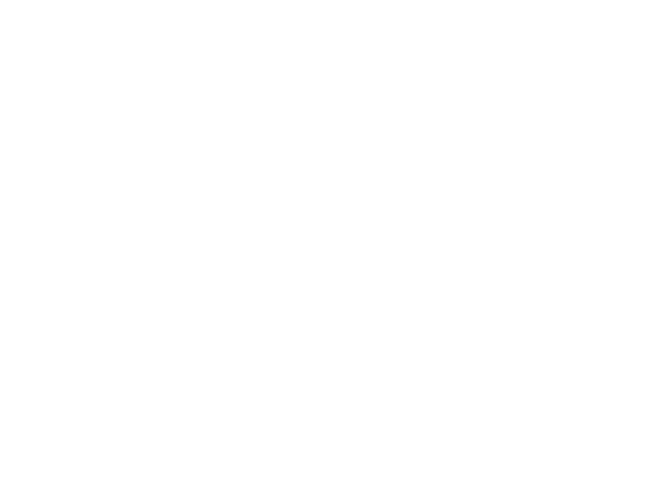

In [13]:
# plot inplane points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-EEPosition_new_inplane[:,1], EEPosition_new_inplane[:,2], -EEPosition_new_inplane[:,0])
plt.show()

In [14]:
print(EEQuaternion_new_inplane.shape)
print(EEPosition_new_inplane.shape)

(31541, 4)
(31541, 3)


<IPython.core.display.Javascript object>


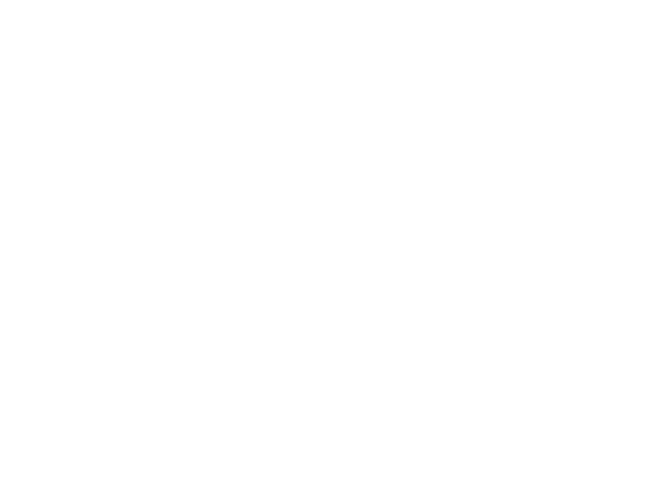

In [15]:
# plot plane
x_inplane = -EEPosition_new_inplane[:,1]
y_inplane = EEPosition_new_inplane[:,2]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_inplane, y_inplane)
plt.show()

In [16]:
data = np.array([x_inplane,y_inplane])

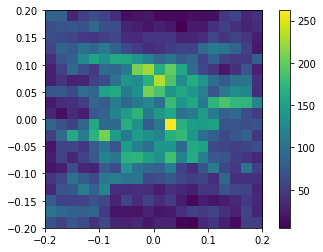

In [17]:
#hisat = np.histogramdd(data.T,bins=[5,5],density=True)
%matplotlib inline
hist, xedges, yedges = np.histogram2d(x_inplane, y_inplane, bins=20)
plt.imshow(hist, extent=(np.amin(x_inplane), np.amax(x_inplane), np.amin(y_inplane), np.amax(y_inplane)))
plt.colorbar()
plt.show()

In [18]:
# 3D histogram doesn't work
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
# xpos = xpos.flatten('F')
# ypos = ypos.flatten('F')
# zpos = np.zeros_like(xpos)

# # Construct arrays with the dimensions for the 16 bars.
# dx = 0.5 * np.ones_like(zpos)
# dy = dx.copy()
# dz = hist.flatten()

# ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

# plt.show()

In [19]:
# discretelize
plane_res = 0.01
xis = np.ceil((x_inplane - xmin) / plane_res).astype(np.int16)-1
yis = np.ceil((y_inplane - ymin) / plane_res).astype(np.int16)-1
print(xis)
print(yis)

[39 39 39 ... 28  4  4]
[36 37 39 ...  9 38 36]


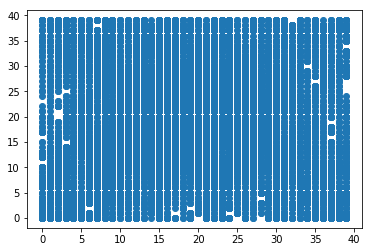

In [20]:
# plot discrete
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xis, yis,cmap="hot")
plt.show()

In [21]:
keys = ['NameE','Sex','Sex']
values = ['Tim','Male',23]
Dic1 = dict(map(lambda x,y:[x,y],keys,values))

In [22]:
Dic1

{'NameE': 'Tim', 'Sex': 23}

In [23]:
xis.shape

(31541,)

In [24]:
x_inplane.shape

(31541,)

In [25]:
EEOrientation_new_inplane.shape

(31541, 3)

In [26]:
# map orientation inforation to each grid
hash_orientation = dict()
count = 0
for i in zip(xis,yis):
    if i in hash_orientation:
        value = hash_orientation[i]
        hash_orientation[i] = np.vstack((value,EEOrientation_new_inplane[count,:]))
    else:
        hash_orientation[i] = EEOrientation_new_inplane[count,:]
    count += 1
print(hash_orientation)

{(39, 36): array([[-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [ 0.94702822, -0.2421084 ,  1.89239514],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [ 0.90757   ,  0.8761555 ,  1.57079673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [ 1.10706127,  0.49269652,  0.81324553],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [ 0.90757   ,  0.8761555 ,  1.57079673],
       [ 0.90757   ,  0.8761555 ,  1.57079673],
       [ 0.9075731 , -0.87615484, -1.57079494]]), (39, 37): array([[-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.01463223, -0.4926959 , -2.32834673],
       [-2.014632

In [27]:
# hash map to store orientation configs
hash_plot = dict()
hash_plot.fromkeys(hash_orientation.keys())

{(39, 36): None,
 (39, 37): None,
 (39, 39): None,
 (7, 1): None,
 (6, 1): None,
 (4, 1): None,
 (2, 1): None,
 (1, 1): None,
 (13, 12): None,
 (13, 13): None,
 (13, 15): None,
 (13, 17): None,
 (13, 18): None,
 (13, 20): None,
 (13, 21): None,
 (3, 4): None,
 (3, 3): None,
 (4, 2): None,
 (5, 1): None,
 (5, 0): None,
 (28, 5): None,
 (28, 6): None,
 (28, 8): None,
 (22, 13): None,
 (22, 15): None,
 (22, 16): None,
 (22, 18): None,
 (22, 20): None,
 (22, 21): None,
 (22, 23): None,
 (19, 28): None,
 (17, 29): None,
 (16, 31): None,
 (14, 33): None,
 (12, 34): None,
 (11, 36): None,
 (9, 37): None,
 (8, 39): None,
 (7, 28): None,
 (7, 29): None,
 (7, 31): None,
 (7, 32): None,
 (7, 34): None,
 (7, 36): None,
 (7, 37): None,
 (9, 16): None,
 (10, 16): None,
 (10, 15): None,
 (11, 14): None,
 (11, 13): None,
 (12, 12): None,
 (8, 12): None,
 (6, 12): None,
 (5, 12): None,
 (3, 12): None,
 (2, 12): None,
 (0, 12): None,
 (8, 33): None,
 (6, 34): None,
 (4, 36): None,
 (2, 38): None,
 (0, 3

In [28]:
hash_orientation[(13,12)]

array([[-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [ 2.02828646e+00, -5.05017221e-01,  2.35688376e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [ 2.02828646e+00, -5.05017221e-01,  2.35688376e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-1.99489564e-01, -4.92696255e-01, -2.32834625e+00],
       [ 1.76920912e-06, -8.76155019e-01, -1.57079506e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [ 1.76920912e-06, -8.76155019e-01, -1.57079506e+00],
       [ 2.02828646e+00, -5.05017221e-01,  2.35688376e+00],
       [-2.01463223e+00, -4.92695898e-01, -2.32834673e+00],
       [-2.01463223e+00, -4.92695898e-01

In [29]:
# save data
np.save(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\EEPosition_new.npy',EEPosition_new)
np.save(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\EEOrientation_new.npy',EEOrientation_new)
np.save(r'C:\Users\xumw1\Documents\GitHub\robotPathPlanning\logs\EEQuaternion_new.npy',EEQuaternion_new)